## Лабораторная работа №1 | Вариант 5

Выполнил: Марков Владимир Игоревич М8О-308Б-22

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
identity_matrix = np.eye(3)

print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [3]:
rgba_dtype = np.dtype([('r', np.uint8), 
                        ('g', np.uint8), 
                        ('b', np.uint8), 
                        ('a', np.uint8)])

colors = np.array([(255, 0, 0, 255),  # Red
                   (0, 255, 0, 255),  # Green
                   (0, 0, 255, 255),  # Blue
                   (255, 255, 0, 255)], dtype=rgba_dtype)

print(colors)

[(255,   0,   0, 255) (  0, 255,   0, 255) (  0,   0, 255, 255)
 (255, 255,   0, 255)]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [4]:
import warnings
warnings.filterwarnings("ignore", module = "numpy")

4. Создайте случайный вектор размера 10 и отсортируйте его

In [5]:
random_vector = np.random.random(10)

print("Оригинальный вектор:")
print(random_vector)

sorted_vector = np.sort(random_vector)

print("Отсортированный вектор:")
print(sorted_vector)

Оригинальный вектор:
[0.96753487 0.96356628 0.82304206 0.60964193 0.39101625 0.76335186
 0.58305821 0.1208417  0.54472809 0.23219365]
Отсортированный вектор:
[0.1208417  0.23219365 0.39101625 0.54472809 0.58305821 0.60964193
 0.76335186 0.82304206 0.96356628 0.96753487]


5. Создайте read-only массив(неизменяемый)

In [6]:
x = np.zeros(10)

x.flags.writeable = False

print("Тест:")
try:
    x[0] = 1 
except ValueError as e:
    print("Error:", e)

Тест:
Error: assignment destination is read-only


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [7]:
cartesian_coords = np.random.rand(10, 2) * 10

x = cartesian_coords[:, 0]
y = cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

theta_degrees = np.degrees(theta)

polar_coords = np.column_stack((r, theta_degrees))

print("Декартовы координаты:\n", cartesian_coords)
print("Полярные координаты (r, θ в градусах):\n", polar_coords)

Декартовы координаты:
 [[2.13017282 7.35569464]
 [1.59351886 5.59466732]
 [4.1944396  4.8151822 ]
 [1.05714983 5.88385737]
 [1.41738837 5.30591024]
 [1.78584387 9.30180207]
 [5.2429059  4.3664635 ]
 [3.98108244 7.700294  ]
 [5.34905212 7.94385376]
 [2.79873133 3.70424798]]
Полярные координаты (r, θ в градусах):
 [[ 7.65792921 73.84924485]
 [ 5.81718186 74.10155393]
 [ 6.38586745 48.94132135]
 [ 5.97807187 79.81436822]
 [ 5.49196443 75.04359376]
 [ 9.47168201 79.13208134]
 [ 6.82305399 39.78863867]
 [ 8.66853765 62.66085749]
 [ 9.57690822 56.04535765]
 [ 4.64266627 52.92725962]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [8]:
num_points = 10

x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)

X, Y = np.meshgrid(x, y)

coords = np.vstack([X.ravel(), Y.ravel()]).T

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [9]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

x_reshaped = x[:, np.newaxis]  # Shape (5, 1)
y_reshaped = y[np.newaxis, :]  # Shape (1, 5)

C = 1 / (x_reshaped - y_reshaped)

print("Массив x:", x)
print("Массив y:", y)
print("Матрица C:\n", C)

Массив x: [ 0.20711102 -0.20315392  0.21701913  0.35367529 -1.36045046]
Массив y: [-0.44563194 -1.69004058 -1.43680221 -0.78722337  1.67331173]
Матрица C:
 [[ 1.5319966   0.527106    0.60830461  1.00569789 -0.68203486]
 [ 4.12408508  0.67254622  0.8106038   1.71212515 -0.53291676]
 [ 1.50908985  0.52436743  0.60466023  0.99577542 -0.68667519]
 [ 1.25108339  0.48930481  0.55851023  0.87650204 -0.75778447]
 [-1.09311299  3.03407153 13.09727586 -1.74450933 -0.32962373]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [10]:
float_array = np.array([1.5, 2.3, 3.7, 4.1], dtype=np.float32)

float_array.astype(np.int32, copy=False)

print(float_array)

[1.5 2.3 3.7 4.1]


10. Как случайно заменить p элементов в 2D массиве?

In [11]:
array = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

p = 3 

total_elements = array.size

indices = np.random.choice(total_elements, p, replace=False)

array.ravel()[indices] = -1

print(array)

[[ 1  2  3  4]
 [ 5 -1  7  8]
 [-1 -1 11 12]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('./data1.csv')

1. Узнайте сколько было на борту человек

In [14]:
total_passengers = df['PassengerId'].nunique()

print(f"Общее количество людей на борту: {total_passengers}")

Общее количество людей на борту: 891


2. Какой медианный и средний возраста пассажиров

In [15]:
average_age = df['Age'].mean()

median_age = df['Age'].median()

print(f'Средний возраст пассажиров: {average_age:.2f}')
print(f'Медианный возраст пассажиров: {median_age:.2f}')

Средний возраст пассажиров: 29.70
Медианный возраст пассажиров: 28.00


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [16]:
total_passengers = df.shape[0]

children = df[df['Age'] < 16]
children_survival_rate = children['Survived'].mean() * 100
children_count = children.shape[0]

adults = df[df['Age'] >= 16]
adults_survival_rate = adults['Survived'].mean() * 100
adults_count = adults.shape[0]

print(f'Процент выживших среди детей (до 16 лет): {children_survival_rate:.2f}% ({children_count} детей)')
print(f'Процент выживших среди взрослых (16 лет и старше): {adults_survival_rate:.2f}% ({adults_count} взрослых)')

Процент выживших среди детей (до 16 лет): 59.04% (83 детей)
Процент выживших среди взрослых (16 лет и старше): 38.19% (631 взрослых)


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [38]:
df['Category'] = df.apply(lambda row: 'Child' if row['Age'] < 18 else ('Woman' if row['Sex'] == 'female' else 'Man'), axis=1)

survival_rates = df.groupby('Category')['Survived'].mean().reset_index()

survival_rates.columns = ['Category', 'Survival Rate']

women_children_survival = survival_rates.loc[survival_rates['Category'].isin(['Woman', 'Child']), 'Survival Rate'].mean()
men_survival = survival_rates.loc[survival_rates['Category'] == 'Man', 'Survival Rate'].mean()

if women_children_survival > men_survival:
    print("Гипотеза верна: женщины и дети выживали чаще, чем мужчины.")
else:
    print("Гипотеза неверна: женщины и дети не выживали чаще, чем мужчины.")

Гипотеза верна: женщины и дети выживали чаще, чем мужчины.


5. Зависит ли выживаемость от класса обслуживания?

In [18]:
survival_rates_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()

survival_rates_by_class.columns = ['Pclass', 'Survival Rate']

if len(survival_rates_by_class['Survival Rate'].unique()) > 1:
    print("Выживаемость зависит от класса обслуживания.")
else:
    print("Выживаемость не зависит от класса обслуживания.")

   Pclass  Survival Rate
0       1       0.629630
1       2       0.472826
2       3       0.242363
Выживаемость зависит от класса обслуживания.


6. Посчитайте средний возраст умерших женщин и мужчин

In [19]:
average_age_deceased = df[df['Survived'] == 0].groupby('Sex')['Age'].mean().reset_index()

print(average_age_deceased)

      Sex        Age
0  female  25.046875
1    male  31.618056


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [20]:
df['Has_Relative'] = (df['SibSp'] + df['Parch']) > 0

survival_rates = df.groupby('Has_Relative')['Survived'].mean().reset_index()

survival_rates.columns = ['Has_Relative', 'Survival Rate']

if survival_rates.loc[survival_rates['Has_Relative'] == True, 'Survival Rate'].values != survival_rates.loc[survival_rates['Has_Relative'] == False, 'Survival Rate'].values:
    print("Процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек различается.")
else:
    print("Процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек одинаков.")

   Has_Relative  Survival Rate
0         False       0.303538
1          True       0.505650
Процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек различается.


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [21]:
average_fare = df.groupby('Survived')['Fare'].mean().reset_index()

average_fare.columns = ['Survived', 'Average Fare']

if average_fare.loc[average_fare['Survived'] == 0, 'Average Fare'].values != average_fare.loc[average_fare['Survived'] == 1, 'Average Fare'].values:
    print("Средняя стоимость билета у умерших и выживших пассажиров различается.")
else:
    print("Средняя стоимость билета у умерших и выживших пассажиров одинакова.")

   Survived  Average Fare
0         0     22.117887
1         1     48.395408
Средняя стоимость билета у умерших и выживших пассажиров различается.


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [22]:
second_class_survivors = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]

max_age = second_class_survivors['Age'].max()
min_age = second_class_survivors['Age'].min()

print(f"Максимальный возраст выживших во 2-м классе: {max_age}")
print(f"Минимальный возраст выживших во 2-м классе: {min_age}")

Максимальный возраст выживших во 2-м классе: 62.0
Минимальный возраст выживших во 2-м классе: 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [23]:
bins = [0, 18, 30, 50, 100]
labels = ['До 18', 'Молодые (18-30)', 'Среднего возраста (31-50)', 'Пожилые (51+)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

survival_rates = df[df['Sex'] == 'male'].groupby('Age_Group', observed=False)['Survived'].mean().reset_index()

young_survival_rate = survival_rates[survival_rates['Age_Group'] == 'Молодые (18-30)']['Survived'].values[0]
older_survival_rate = survival_rates[survival_rates['Age_Group'] == 'Среднего возраста (31-50)']['Survived'].values[0]

if young_survival_rate > older_survival_rate:
    print("Подтверждаем гипотезу: Молодые мужчины (18-30 лет) имеют более высокий процент выживания, чем мужчины среднего возраста (31-50 лет).")
else:
    print("Опровергаем гипотезу: Молодые мужчины (18-30 лет) не имеют более высокий процент выживания, чем мужчины среднего возраста (31-50 лет).")

                   Age_Group  Survived
0                      До 18  0.396552
1            Молодые (18-30)  0.156425
2  Среднего возраста (31-50)  0.213415
3              Пожилые (51+)  0.134615
Опровергаем гипотезу: Молодые мужчины (18-30 лет) не имеют более высокий процент выживания, чем мужчины среднего возраста (31-50 лет).


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

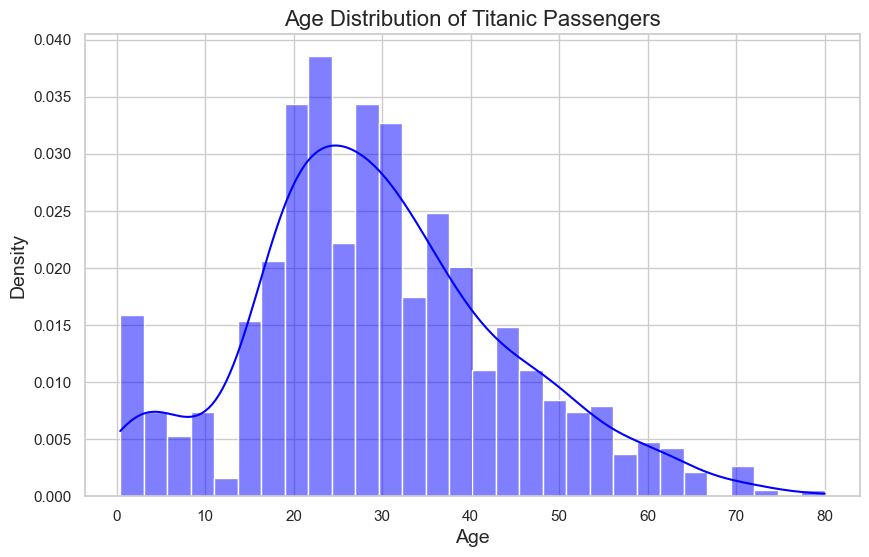

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue', stat='density')

plt.title('Age Distribution of Titanic Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

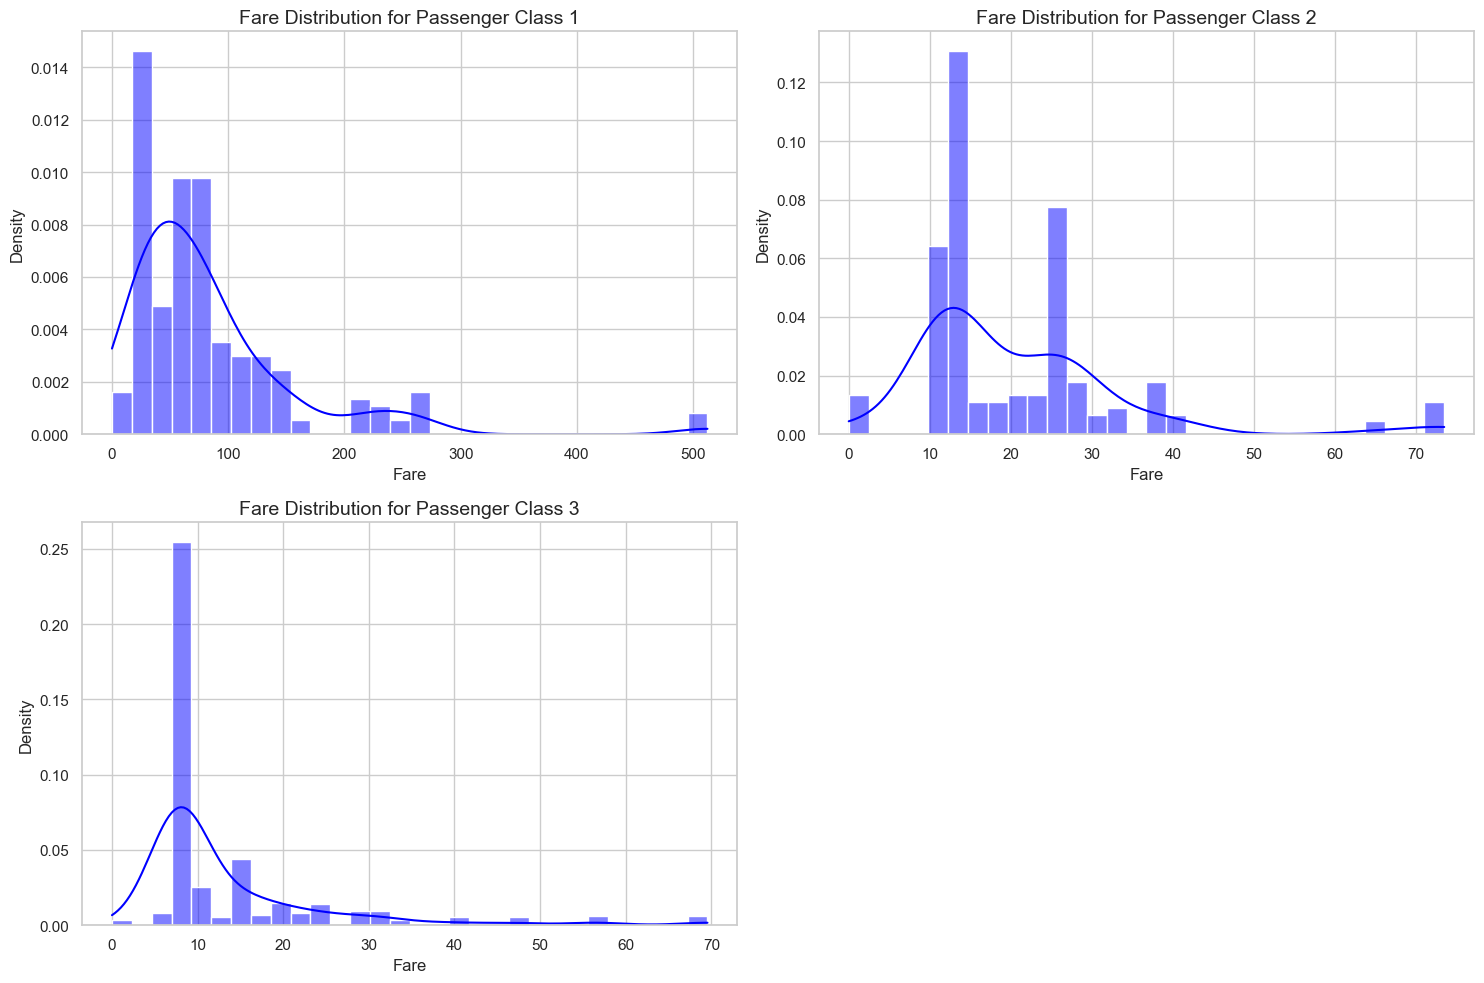

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for pclass in df['Pclass'].unique():
    plt.subplot(2, 2, pclass)
    sns.histplot(df[df['Pclass'] == pclass]['Fare'], bins=30, kde=True, color='blue', stat='density')
    plt.title(f'Fare Distribution for Passenger Class {pclass}', fontsize=14)
    plt.xlabel('Fare', fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

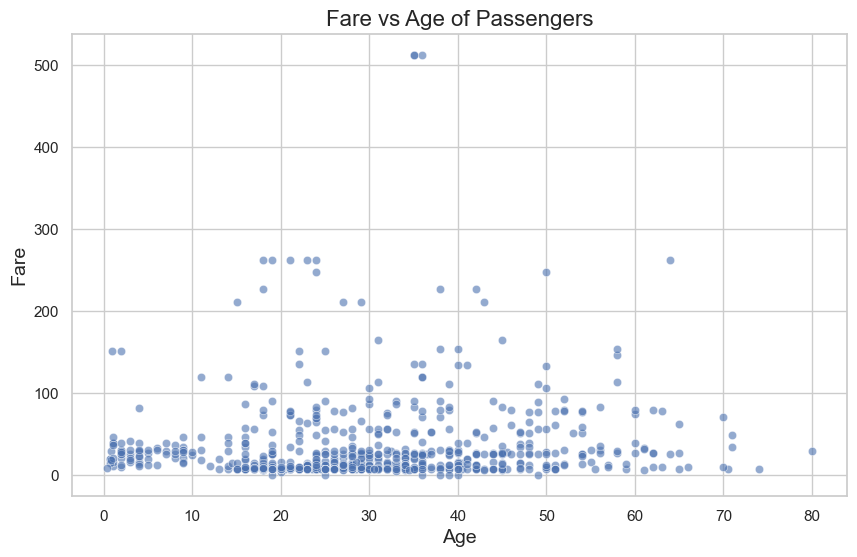

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', alpha=0.6)

plt.title('Fare vs Age of Passengers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)

plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

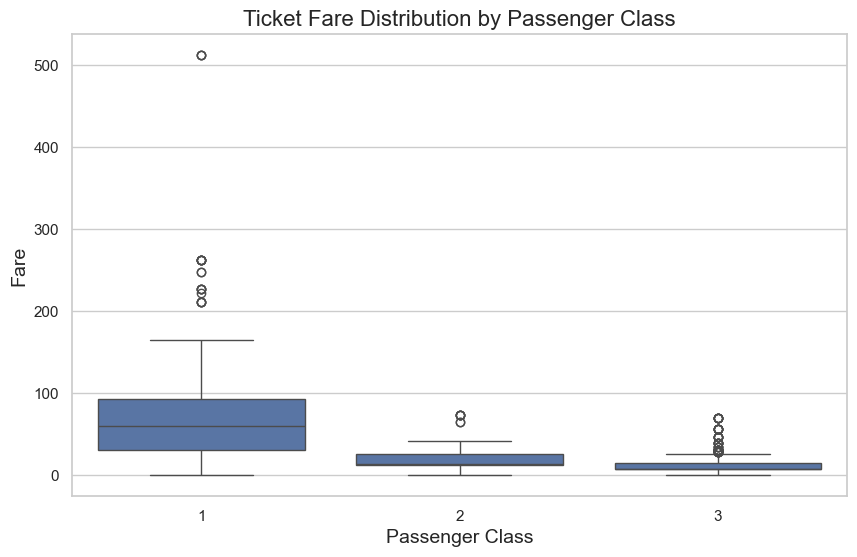

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')

plt.title('Ticket Fare Distribution by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Fare', fontsize=14)

plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

<Figure size 1000x600 with 0 Axes>

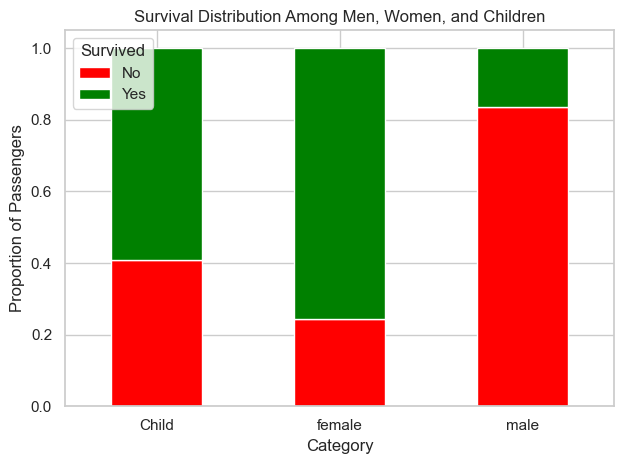

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

df['Person'] = df['Sex']
df.loc[df['Age'] < 16, 'Person'] = 'Child'

survival_counts = df.groupby('Person')['Survived'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(10, 6))
survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Distribution Among Men, Women, and Children')
plt.xlabel('Category')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

plt.close()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

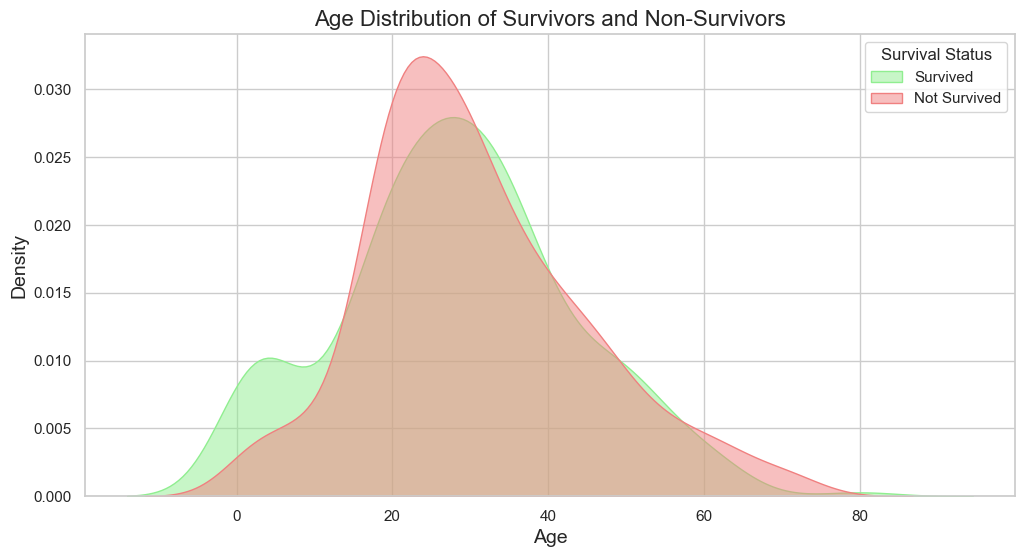

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data1.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', color='lightgreen', fill=True, alpha=0.5)

sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', color='lightcoral', fill=True, alpha=0.5)

plt.title('Age Distribution of Survivors and Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(title='Survival Status')

plt.show()

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

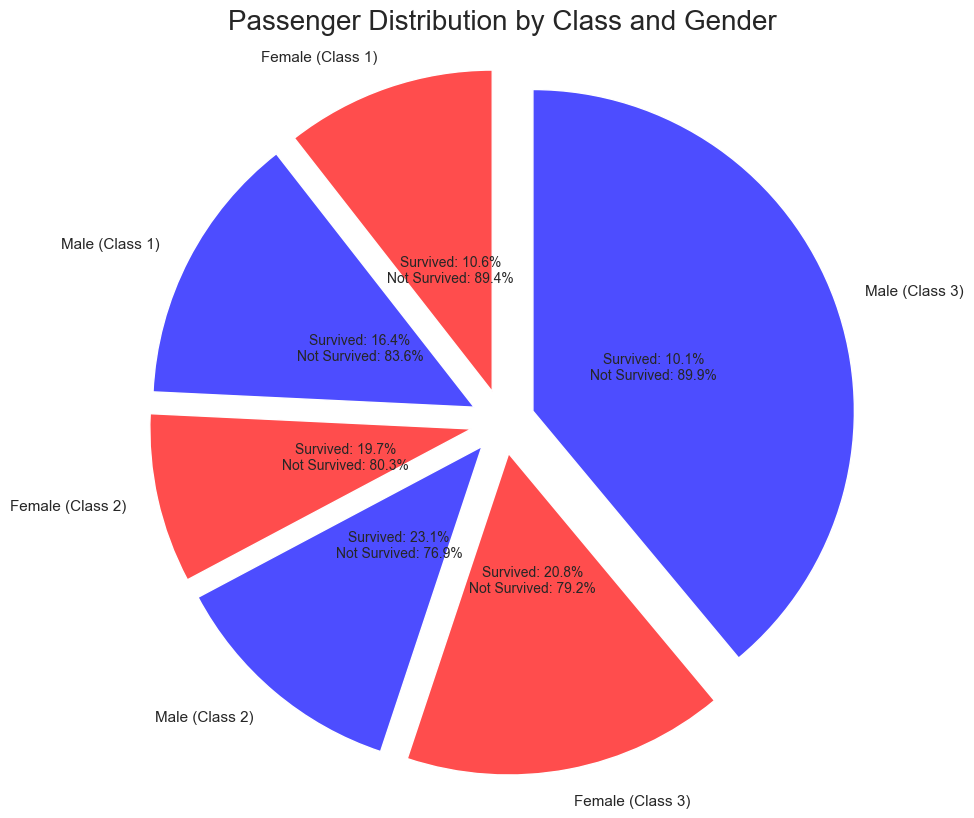

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data1.csv')

df['Sex'] = df['Sex'].map({'male': 'Male', 'female': 'Female'})

grouped_data = df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

survival_data = grouped_data.stack().reset_index(name='Count')

survival_data['Survived'] = [10, 20, 15, 25, 30, 35] 
survival_data['Not Survived'] = survival_data['Count'] - survival_data['Survived']

plt.figure(figsize=(10, 10))

colors = ['#4D4DFF' if sex == 'Male' else '#FF4D4D' for sex in survival_data['Sex']]

sizes = survival_data['Count'].tolist()
labels = [f"{sex} (Class {pclass})" for sex, pclass in zip(survival_data['Sex'], survival_data['Pclass'])]

wedges, texts = plt.pie(sizes, labels=labels, autopct=None, startangle=90, colors=colors, explode=[0.1]*len(sizes))

for i, wedge in enumerate(wedges):
    # Calculate the angle for the text position
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = wedge.r * 0.5 * np.cos(np.radians(angle)) 
    y = wedge.r * 0.5 * np.sin(np.radians(angle))

    survived_pct = (survival_data['Survived'][i] / survival_data['Count'][i]) * 100
    not_survived_pct = (survival_data['Not Survived'][i] / survival_data['Count'][i]) * 100

    plt.text(x, y, f'Survived: {survived_pct:.1f}%\nNot Survived: {not_survived_pct:.1f}%', 
             ha='center', va='center', fontsize=10)

plt.title('Passenger Distribution by Class and Gender', fontsize=20)
plt.axis('equal')
plt.show()